In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked Bar Graphs

In [4]:
# Cargamos el conjunto de datos: tips.
ds_tips = sns.load_dataset('tips')

In [9]:
# pequeña muestra
ds_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
#Se añaden los datos por día de la semana y género.
agg_tips = ds_tips.groupby(['day','sex'], observed=True)['tip'].sum().unstack().fillna(0)
agg_tips

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


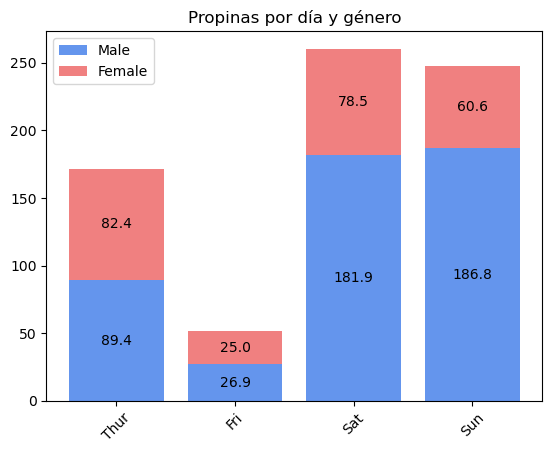

In [18]:
# Creamos el gráfico de barras apiladas
fig, ax = plt.subplots()

#Trazamos las barras de 'male' por día
ax.bar(agg_tips.index, agg_tips['Male'], label = 'Male', color= 'cornflowerblue')
# Trazamos las barras de 'female'
ax.bar(agg_tips.index, agg_tips['Female'], bottom=agg_tips['Male'], label = 'Female', color= 'lightcoral')

for i, day in enumerate(agg_tips.index):
    male_tip = agg_tips.loc[day, 'Male']
    female_tip = agg_tips.loc[day, 'Female']
    ax.text(i, male_tip/2, f'{male_tip:.1f}', ha='center', va='center')
    ax.text(i, male_tip + female_tip/2, f'{female_tip:.1f}', ha='center', va='center')

ax.set_title('Propinas por día y género')
ax.legend()

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

plt.show()

# Radar Charts

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [23]:
# Cargamos el conjunto de datos de vehículos
df_mpg = sns.load_dataset('mpg')
df_mpg = df_mpg.dropna()
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
#Seleccionamos las variables.
df_selected =  df_mpg[['mpg','cylinders','horsepower','weight','acceleration']]

# Creamos el objeto StandardScaler para normalizar los valores
scaler = StandardScaler()

# Ajustamos y transformamos los datos
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
df_normalized.head()

,mpg,cylinders,horsepower,weight,acceleration
0,-0.698638,1.483947,0.664133,0.620540,-1.285258
1,-1.083498,1.483947,1.574594,0.843334,-1.466724
2,-0.698638,1.483947,1.184397,0.540382,-1.648189
3,-0.955212,1.483947,1.184397,0.536845,-1.285258
4,-0.826925,1.483947,0.924265,0.555706,-1.829655


In [55]:
#Calculamos las medias
df_means = df_normalized.mean()
df_means

mpg             1.450087e-16
cylinders      -1.087565e-16
horsepower     -1.812609e-16
weight         -1.812609e-17
acceleration    4.350262e-16
dtype: float64

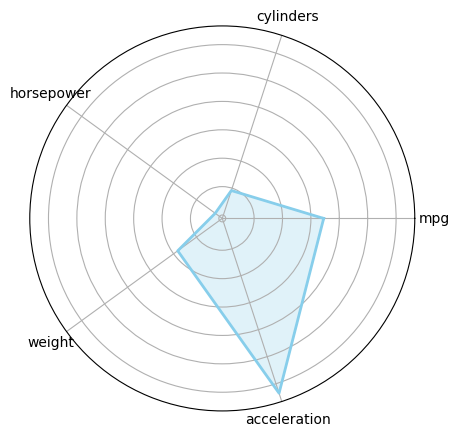

In [54]:
# Creamos una lista de ángulos
angles = np.linspace(0, 2 * np.pi, len(df_means), endpoint=False).tolist()

# Hacemos que el gráfico sea circular
angles += angles[:1]

# Creamos el gráfico de radar
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Añadimos el primer valor al final para cerrar la figura
values = df_means.tolist() + df_means.tolist()[:1]

# Dibujamos la línea y rellenamos con color
ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.plot(angles, values, color='skyblue', linewidth=2)

# Añadimos las etiquetas para cada característica
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_normalized.columns)

# Mostramos el gráfico
plt.show()

# Ridgeline Charts

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Obtenemos los datos del repositorio de GitHub de Plotly
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv')
temp.replace([np.inf, -np.inf], np.nan, inplace=True)
temp.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
0,1/1/1948,10,8.0,7.0
1,1/2/1948,6,4.0,3.0
2,1/3/1948,7,4.0,2.0
3,1/4/1948,7,4.0,2.0
4,1/5/1948,7,3.0,0.0


In [68]:
# Creamos una variable de mes.
temp['month'] = pd.to_datetime(temp['Date']).dt.month
temp.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month
0,1/1/1948,10,8.0,7.0,1
1,1/2/1948,6,4.0,3.0,1
2,1/3/1948,7,4.0,2.0,1
3,1/4/1948,7,4.0,2.0,1
4,1/5/1948,7,3.0,0.0,1


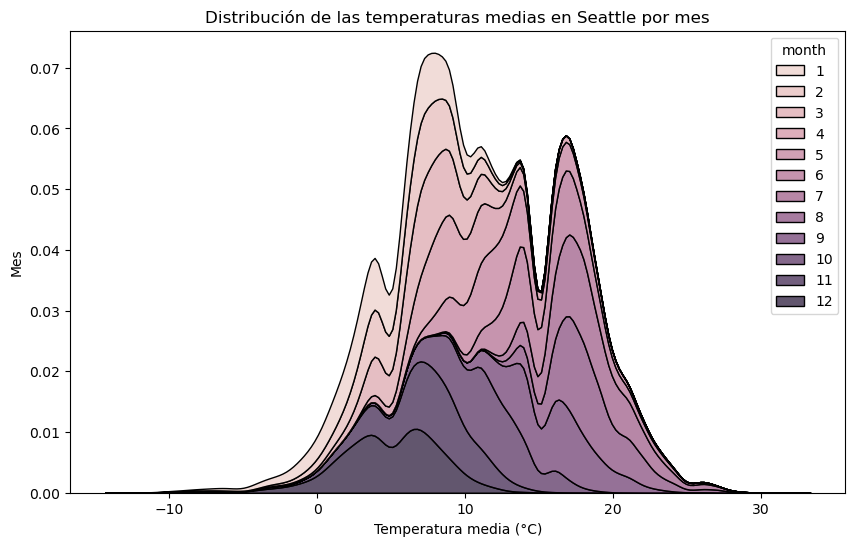

In [69]:
# Creamos una lista con los nombres de los meses
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Creamos el gráfico Ridgeline
plt.figure(figsize=(10,6))
sns.kdeplot(data=temp, x='Mean_TemperatureC', hue='month', multiple='stack', hue_order=months)

plt.title('Distribución de las temperaturas medias en Seattle por mes')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Mes')
plt.show()